<a href="https://colab.research.google.com/github/Devraj02-sys/AI-ML-project/blob/main/Neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

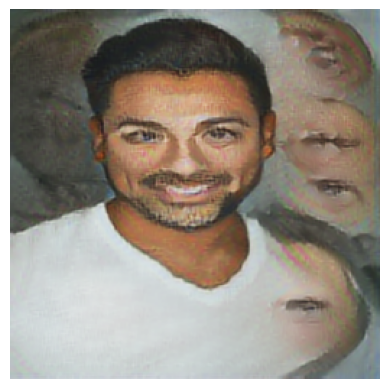

True

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow_hub as hub

# Load and preprocess images
def load_and_process_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, (256, 256))  # Reduced size for faster processing
    img = tf.cast(img, tf.float32) / 255.0  # Normalize
    return tf.expand_dims(img, axis=0)

# Deprocess image for visualization
def deprocess_image(image):
    image = image.numpy().squeeze() * 255  # Denormalize
    return np.clip(image, 0, 255).astype('uint8')

# Load pre-trained Fast Style Transfer model from TensorFlow Hub
def fast_neural_style_transfer(content_path, style_path):
    content_image = load_and_process_image(content_path)
    style_image = load_and_process_image(style_path)

    model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

    return deprocess_image(stylized_image)

# Run the NST process
content_image_path = '/content/dataset/Person1/img1.jpg'  # Replace with actual content image path
style_image_path = '/content/dataset/Person1/img1.jpg'  # Replace with actual style image path
output_image = fast_neural_style_transfer(content_image_path, style_image_path)

# Show result
plt.imshow(output_image)
plt.axis('off')
plt.show()

# Save output
cv2.imwrite('styled_image.jpg', output_image)